# Examples of implementation of models.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model 1: Using "keras.Sequential"
model_1 = keras.Sequential(name="Model1")
model_1.add(keras.Input(shape=(100,)))
model_1.add(layers.Dense(10, activation="relu", name="Layer"))

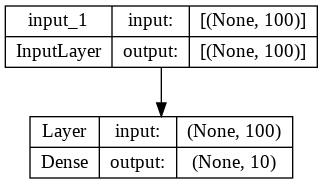

In [ ]:
keras.utils.plot_model(model_1, "model_1.png", show_shapes=True)

In [ ]:
model_1.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (Dense)               (None, 10)                1010      
                                                                 
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model 2: Using Functional Model
inputs = keras.Input(shape=(200,))
outputs = layers.Dense(20, activation="relu", name="Layer")(inputs)
model_2 = keras.Model(inputs=inputs, outputs=outputs, name = "Model2")

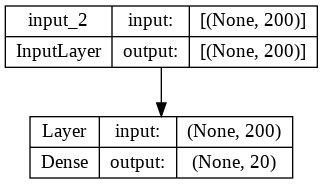

In [ ]:
keras.utils.plot_model(model_2, "model_2.png", show_shapes=True)

In [ ]:
model_2.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 Layer (Dense)               (None, 20)                4020      
                                                                 
Total params: 4,020
Trainable params: 4,020
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model 3: Subclass 
class SimpleModel(keras.Model):

    def __init__(self,dim_out):
        super().__init__()
        self.layer = layers.Dense(dim_out, activation="relu", name="Layer")

    def call(self, inputs):
        outputs = self.layer(inputs)
        return outputs

model_3 = SimpleModel(30)
model_3.build(input_shape=(None, 300))

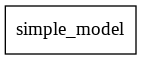

In [ ]:
keras.utils.plot_model(model_3, "model_3.png", show_shapes=True)

In [ ]:
model_3.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (Dense)               multiple                  9030      
                                                                 
Total params: 9,030
Trainable params: 9,030
Non-trainable params: 0
_________________________________________________________________


# Mixing and matching different components

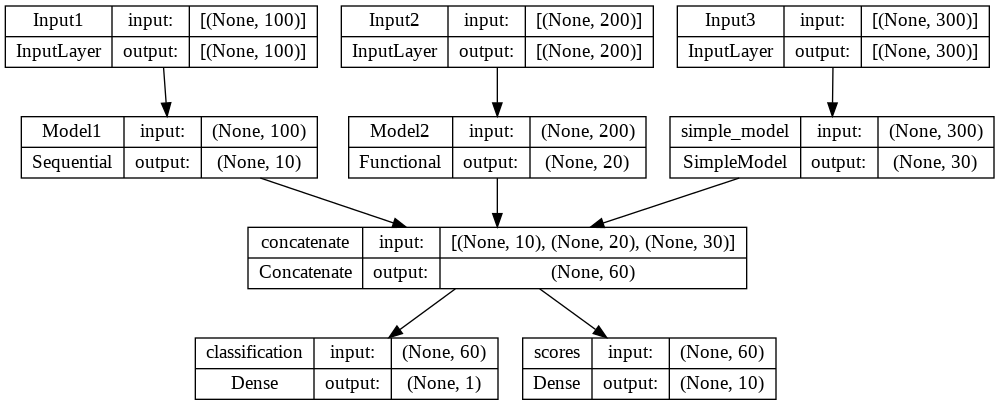

In [ ]:
input_1 = keras.Input(shape=(100,), name="Input1")
input_2 = keras.Input(shape=(200,), name="Input2")
input_3 = keras.Input(shape=(300,), name="Input3")

features1 = model_1(input_1)
features2 = model_2(input_2)
features3 = model_3(input_3)
features = layers.Concatenate()([features1, features2, features3])

classification = layers.Dense(1, activation="sigmoid",name="classification")(features)
scores = layers.Dense(10, activation="relu",name="scores")(features)
model_4 = keras.Model(inputs=[input_1, input_2, input_3], outputs=[classification, scores])

keras.utils.plot_model(model_4, "model_4.png", show_shapes=True)

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MixModel(keras.Model):

    def __init__(self):
        super().__init__()
        self.branch_1 = model_1
        self.branch_2 = model_2
        self.branch_3 = model_3
        self.concatenation = layers.Concatenate()
        self.classifier = layers.Dense(1, activation="sigmoid",name="classification")
        self.calculator = layers.Dense(10, activation="relu",name="scores")

    def call(self, inputs):
      features1 = self.branch_1(inputs['1'])
      features2 = self.branch_2(inputs['2'])
      features3 = self.branch_3(inputs['3'])
      features = self.concatenation([features1, features2, features3])

      classification = self.classifier(features)
      scores = self.calculator(features)

      return classification, scores

model_5 = MixModel()

In [ ]:
#keras.utils.plot_model(model_5, "model_5.png", show_shapes=True)

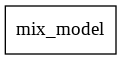

In [ ]:
import numpy as np
num_samples = 50
inputs_model_5 = {'1':np.random.normal(size=(num_samples, 100)),
                  '2':np.random.normal(size=(num_samples, 200)),
                  '3':np.random.normal(size=(num_samples, 300))}

classif,scores = model_5(inputs_model_5)
keras.utils.plot_model(model_5, "model_5.png", show_shapes=True)

# Layers & Weights

In [ ]:
for ll in model_4.layers:
  print(ll.name, ll.input)

Input1 KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='Input1'), name='Input1', description="created by layer 'Input1'")
Input2 KerasTensor(type_spec=TensorSpec(shape=(None, 200), dtype=tf.float32, name='Input2'), name='Input2', description="created by layer 'Input2'")
Input3 KerasTensor(type_spec=TensorSpec(shape=(None, 300), dtype=tf.float32, name='Input3'), name='Input3', description="created by layer 'Input3'")
Model1 KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model2 KerasTensor(type_spec=TensorSpec(shape=(None, 200), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
simple_model KerasTensor(type_spec=TensorSpec(shape=(None, 300), dtype=tf.float32, name='Input3'), name='Input3', description="created by layer 'Input3'")
concatenate [<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'Model1')>, <Keras

In [ ]:
for ww in model_4.weights:
  print(ww.name, ww.dtype, ww.shape)

Layer/kernel:0 <dtype: 'float32'> (100, 10)
Layer/bias:0 <dtype: 'float32'> (10,)
Layer/kernel:0 <dtype: 'float32'> (200, 20)
Layer/bias:0 <dtype: 'float32'> (20,)
Layer/kernel:0 <dtype: 'float32'> (300, 30)
Layer/bias:0 <dtype: 'float32'> (30,)
classification/kernel:0 <dtype: 'float32'> (60, 1)
classification/bias:0 <dtype: 'float32'> (1,)
scores/kernel:0 <dtype: 'float32'> (60, 10)
scores/bias:0 <dtype: 'float32'> (10,)


In [ ]:
model_4.layers[4].input.shape

TensorShape([None, 200])

# Multiclass Classification



**Dataset: MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#print('Train subset ----------------------------- ')
#print('Num samples, h, w:',train_images.shape)
#print('Num samples:', len(train_labels))
#print('Labels:',train_labels)

#print('Test subset ------------------------------ ')
#print('Num samples, h, w:',test_images.shape)
#print('Num samples:', len(test_labels))
#print('Labels:',test_labels)

Train subset ----------------------------- 
Num samples, h, w: (60000, 28, 28)
Num samples: 60000
Labels: [5 0 4 ... 5 6 8]
Test subset ------------------------------ 
Num samples, h, w: (10000, 28, 28)
Num samples: 10000
Labels: [7 2 1 ... 4 5 6]


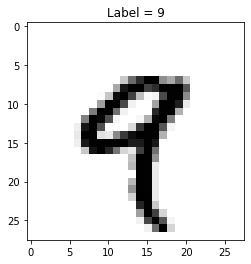

In [ ]:
#import matplotlib.pyplot as plt

#img = train_images[4]
#label = train_labels[4]

#plt.imshow(img, cmap=plt.cm.binary)
#plt.title('Label = ' + str(label)) 
#plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# From the train dataset, separate 10000 examples for validation.

In [ ]:
# Generating batches 
batch_size = 128
num_imgs = 60000
num_batches = int(np.ceil(num_imgs / batch_size))
index = 0
imgs_batches = []
labs_batches = []

for ii in range(num_batches):
  imgs_b = train_images[index : index + batch_size]
  labs_b = train_labels[index : index + batch_size]
  imgs_batches.append(imgs_b)
  labs_batches.append(labs_b)
  index += batch_size 

print(len(imgs_batches),imgs_batches[0].shape,imgs_batches[-1].shape)
print(len(labs_batches),labs_batches[0].shape,imgs_batches[-1].shape)

469 (128, 784) (96, 784)
469 (128,) (96, 784)


**Network**

In [ ]:
# Exercise: 
# Using one of the presented ways, implement a new network with the following layers.
# Dense Layer with 512 units - 'RELU' activation function.
# Dropout Layer - rate = 0.5
# Dense Layer with 10 units

**Training**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Use other metrics. E.g: RootMeanSquaredError, FalseNegatives, BinaryAccuracy
# Explore other optimizer. E.g: SGD (lr =1e-3)
# Explore other loss function. E.g: BinaryCrossentropy

num_epochs = 10
model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data = (val_samples,val_labels))

# Evaluation

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

In [ ]:
# Use the "evaluate" method to print all metrics and cost functions.
# ... = model.evaluate(...)
# print(f"test_loss: {test_loss}, test_metric1: {test_metric1}, ...")